This script takes a picture from your webcam, POSTs the picture to the Flask Panda Detector API, and prints the response.

I also made a command-line version at `webcam-upload.py`.

YES. It's a panda


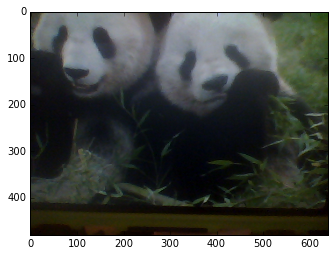

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

import numpy as np
import requests
import cv2

def grab_img(ramp_frames=0, cam_port=0):
    """Grab a single frame from the webcam.

    Parameters:
    -----------
    ramp_frames: the number of frames to discard while cam adjusts to light level
    cam_port: the webcam's device index

    Returns:
    --------
    frame: a single RBG image
    """
    cap = cv2.VideoCapture(cam_port)

    # get past the ramp_frames, if any
    for _ in range(ramp_frames):
        cap.read()

    # Capture frame-by-frame
    ret, frame = cap.read()

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

    return frame

def upload_img(img, temp_img_name='tmp.jpg', panda_api_url='http://54.210.9.61/panda_app/'):
    # save the image to a file
    cv2.imwrite(temp_img_name, img)

    with open(temp_img_name) as f:
        response = requests.post(panda_api_url, files={"file":f})

    return response


cam_img = grab_img(ramp_frames=12)
response = upload_img(cam_img)
plt.imshow(cv2.cvtColor(cam_img, cv2.COLOR_BGR2RGB));
print response.text